In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
from PIL import Image
import os
from matplotlib import image
%matplotlib inline

In [36]:
train_ben_dir = '../data/train/benign'
train_mal_dir = '../data/train/malignant'
test_ben_dir = '../data/test/benign'
test_mal_dir = '../data/test/malignant'

length = 224
width = 244

In [37]:
# load the image
image = Image.open('../data/train/benign/100.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
RGB
(224, 224)


uint8
(224, 224, 3)


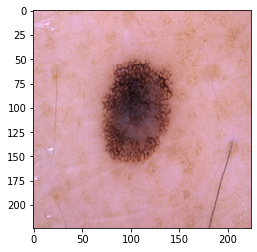

In [38]:
# load and display an image with Matplotlib
from matplotlib import image

# load image as pixel array
data = image.imread('../data/train/benign/100.jpg')

# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

# display the array of pixels as an image
plt.imshow(data)
plt.show()

In [16]:
from PIL import Image
from numpy import asarray

# load the image
image = Image.open('../data/train/benign/100.jpg')

# convert image to numpy array
data = np.asarray(image)

# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)

# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(224, 224, 3)
None
RGB
(224, 224)


In [130]:
def create_data(directory,label):
    train_data = []
    for img in tqdm(os.listdir(directory)):
        path = os.path.join(directory,img)
        img = image.imread(path)
        train_data.append([np.array(img),np.array(label)])
    return np.array(train_data)
        

In [131]:
train_benign = create_data(train_ben_dir,label=[0,1])
train_malignant = create_data(train_mal_dir,label=[1,0])
test_benign = create_data(test_ben_dir,label=[0,1])
test_malignant = create_data(test_mal_dir,label=[1,0])

100%|██████████| 300/300 [00:00<00:00, 507.37it/s]


In [132]:
train = np.concatenate([train_benign,train_malignant])
train = np.take(train,np.random.rand(train.shape[0]).argsort(),axis=0,out=train)
test = np.concatenate([test_benign,test_malignant])
test = np.take(test,np.random.rand(test.shape[0]).argsort(),axis=0,out=test)
print(train.shape)
print(test.shape)

(2637, 2)
(660, 2)


In [159]:
X_train,y_train = train[:,0]/225,train[:,1]
X_test,y_test = test[:,0]/225,test[:,1]

X_train = np.concatenate([arr[np.newaxis] for arr in X_train])
X_test = np.concatenate([arr[np.newaxis] for arr in X_test])
y_train = np.concatenate([arr[np.newaxis] for arr in y_train])
y_test = np.concatenate([arr[np.newaxis] for arr in y_test])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2637, 224, 224, 3)
(660, 224, 224, 3)
(2637, 2)
(660, 2)


In [112]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.applications import ResNet50

Using TensorFlow backend.


In [113]:
#base_model= ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))

/Users/HarrisonHoffman/opt/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 9s 0us/step


In [178]:
model= Sequential()
#model.add(base_model)
model.add(Dense(50,input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 224, 224, 50)      200       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 222, 222, 64)      28864     
_________________________________________________________________
flatten_10 (Flatten)         (None, 3154176)           0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 3154176)           0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 6308354   
Total params: 6,337,418
Trainable params: 6,337,418
Non-trainable params: 0
_________________________________________________________________


In [179]:
from keras import optimizers
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer=optimizers.adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])



In [180]:
model.fit(x=X_train,y=y_train,batch_size=64,epochs=10)

Epoch 1/10
2637/2637 [==============================] - 264s 100ms/step - loss: 2.7689 - accuracy: 0.5745
Epoch 2/10
2637/2637 [==============================] - 231s 88ms/step - loss: 0.4716 - accuracy: 0.7630
Epoch 3/10
2637/2637 [==============================] - 226s 86ms/step - loss: 0.4075 - accuracy: 0.7933
Epoch 4/10
2637/2637 [==============================] - 233s 89ms/step - loss: 0.3616 - accuracy: 0.8180
Epoch 5/10
2637/2637 [==============================] - 222s 84ms/step - loss: 0.3286 - accuracy: 0.8320
Epoch 6/10
2637/2637 [==============================] - 217s 82ms/step - loss: 0.3144 - accuracy: 0.8502
Epoch 7/10
2637/2637 [==============================] - 225s 85ms/step - loss: 0.2978 - accuracy: 0.8658
Epoch 8/10
2637/2637 [==============================] - 217s 82ms/step - loss: 0.2659 - accuracy: 0.8866
Epoch 9/10
2637/2637 [==============================] - 217s 82ms/step - loss: 0.2427 - accuracy: 0.9025
Epoch 10/10
2637/2637 [==============================]

In [181]:
preds = model.predict(X_test)

In [182]:
preds

array([[0.35488975, 0.64511025],
       [0.36735475, 0.63264525],
       [0.06297393, 0.9370261 ],
       ...,
       [0.01137406, 0.98862594],
       [0.85351187, 0.14648812],
       [0.9762348 , 0.02376517]], dtype=float32)

In [196]:
preds_converted = []
for pred in preds:
    if pred[0] > .50:
        preds_converted.append(1)
    else:
        preds_converted.append(0)
        
y_test_converted = []
for y in y_test:
    if y[0] > .50:
        y_test_converted.append(1)
    else:
        y_test_converted.append(0)
        

In [200]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test_converted,preds_converted))
print(classification_report(y_test_converted,preds_converted))

[[264  96]
 [ 18 282]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       360
           1       0.75      0.94      0.83       300

    accuracy                           0.83       660
   macro avg       0.84      0.84      0.83       660
weighted avg       0.85      0.83      0.83       660

